**Stock Market Data Analysis**

**We'll be answering the following questions along the way**:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\yanke_000\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [28]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','TSLA','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [29]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,108.947945,110.020198,107.775059,108.905020,4.760765e+07,107.667019
std,10.271493,10.213773,10.259021,10.213294,2.113434e+07,9.569162
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,98.839996,100.400002,98.110001,99.440002,3.316960e+07,98.830002
50%,110.000000,111.010002,108.660004,109.690002,4.334120e+07,108.428402
75%,116.370003,117.440002,115.080002,115.959999,5.567880e+07,114.398953
max,132.850006,132.970001,130.699997,132.070007,1.622063e+08,129.419998


In [30]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-06-18 to 2016-06-17
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


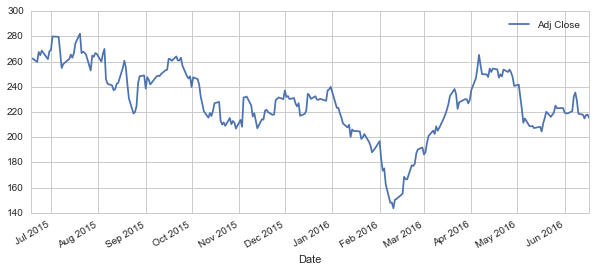

In [31]:
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

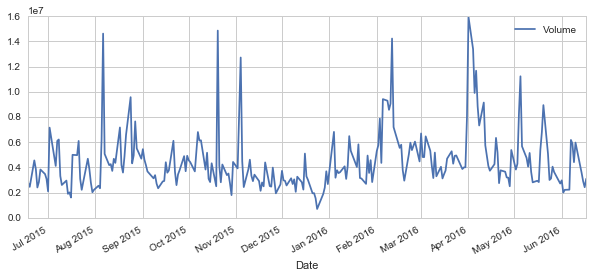

In [32]:
TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [34]:
#to calculate moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name]=pd.rolling_mean(TSLA['Adj Close'],ma)

C:\Users\yanke_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\yanke_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\yanke_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


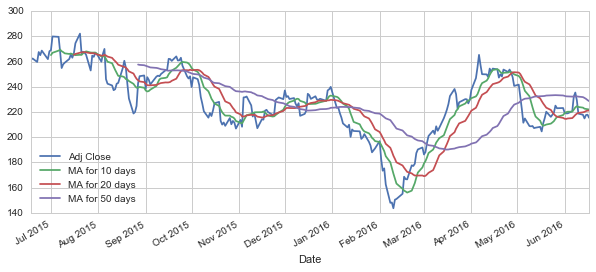

In [35]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

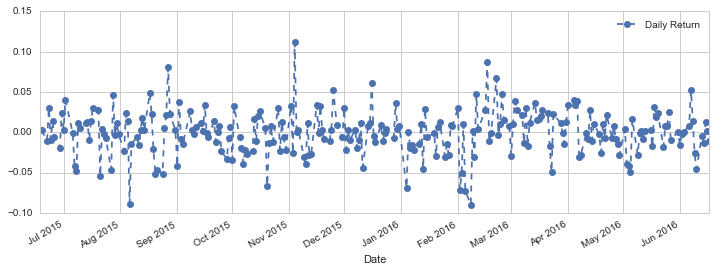

In [37]:
# Daily returns analysis
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
TSLA['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

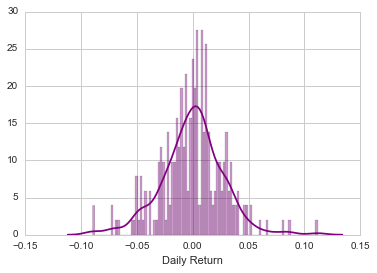

In [38]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

In [39]:
closing_df = DataReader(['AAPL','GOOG','TSLA','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.tail()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-06-13,97.339996,715.239990,718.359985,217.869995
2016-06-14,97.459999,719.299988,718.270020,214.960007
2016-06-15,97.139999,714.260010,718.919983,217.699997
2016-06-16,97.550003,717.510010,710.359985,217.929993
2016-06-17,95.330002,706.390015,691.719971,215.470001


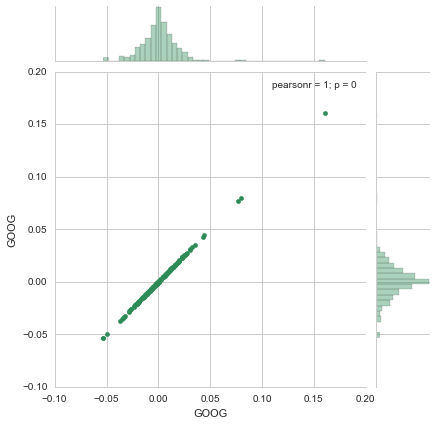

In [40]:
tech_rets = closing_df.pct_change()
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

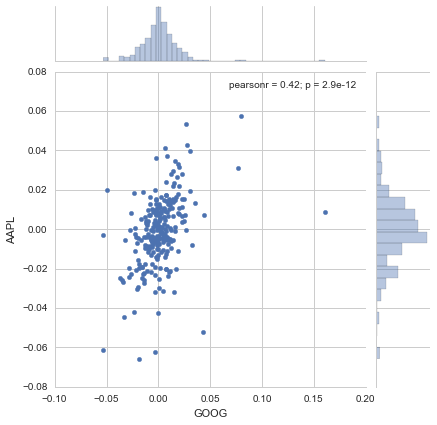

In [44]:
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter')

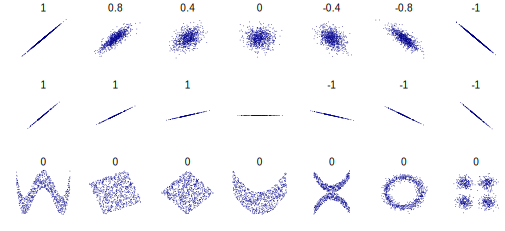

In [45]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

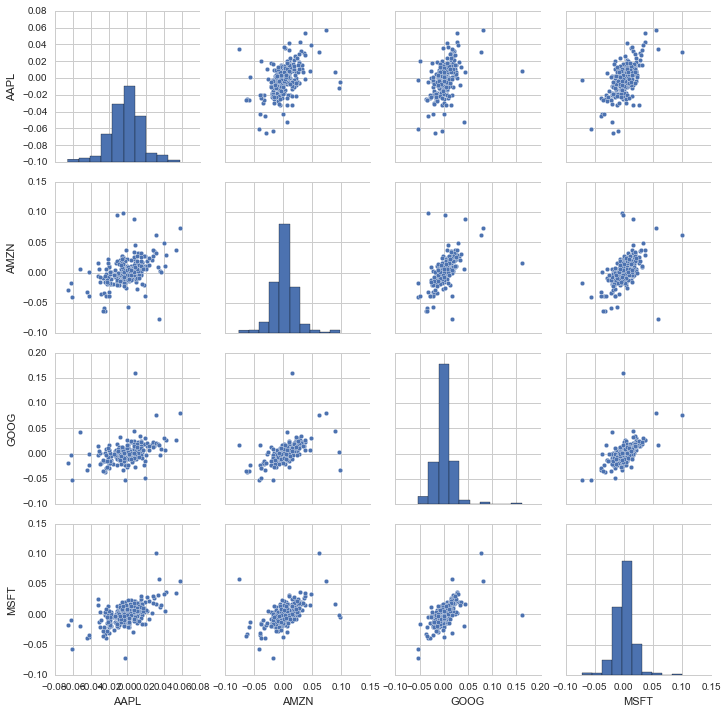

In [17]:
sns.pairplot(tech_rets.dropna())

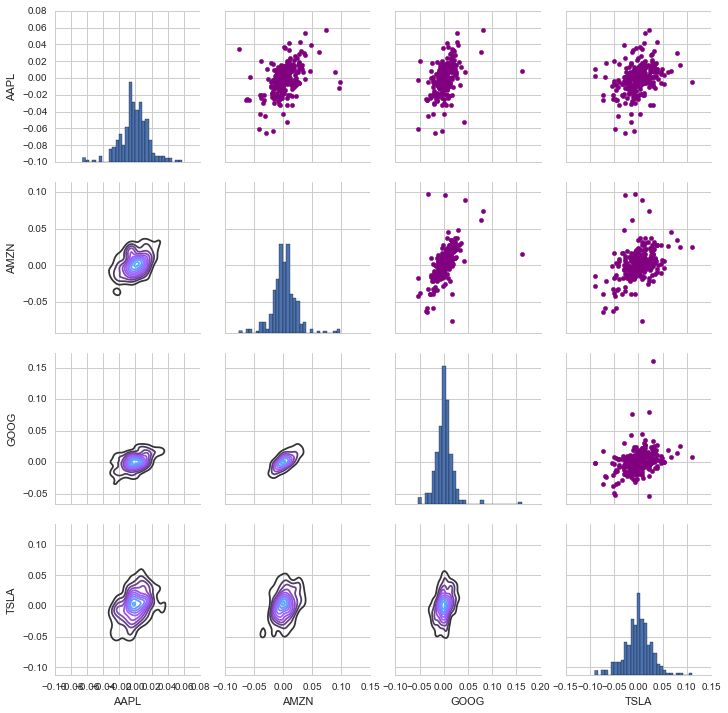

In [46]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

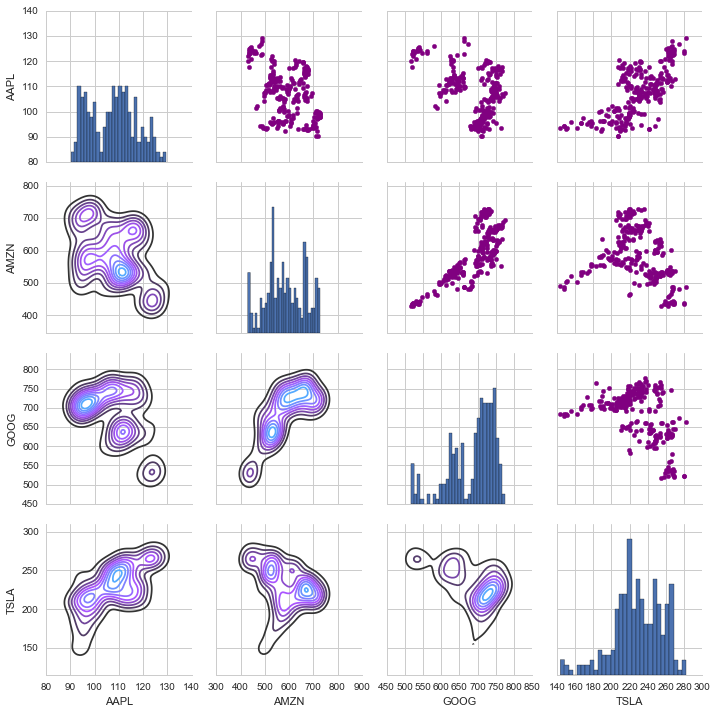

In [47]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

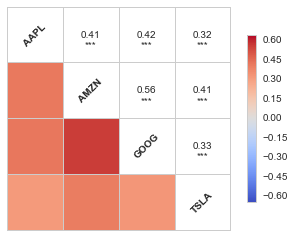

In [48]:
sns.corrplot(tech_rets.dropna(),annot=True)




**RISK ANALYSIS**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

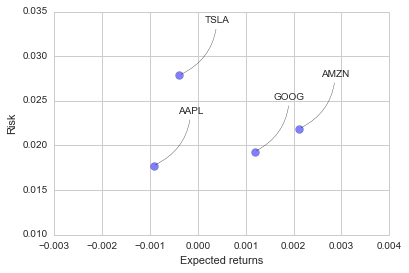

In [52]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.035])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

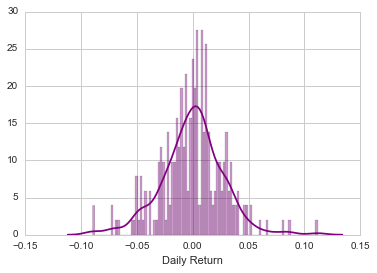

In [53]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

In [54]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.028031891283851848

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = $28,000.

In [55]:
rets['TSLA'].quantile(0.05)

-0.047616264338057795

In [56]:
rets['AMZN'].quantile(0.05)

-0.032752236116991323

In [57]:
rets['GOOG'].quantile(0.05)

-0.024786888636100977

**Value at Risk using the Monte Carlo method**

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame TSLA

In [59]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for TSLA
mu = rets.mean()['TSLA']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['TSLA']

In [61]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

TSLA.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-06-18,262.000000,263.459991,260.019989,261.890015,2782700,261.890015,NaN,NaN,NaN,NaN
2015-06-19,262.399994,263.799988,260.100006,262.510010,2463000,262.510010,NaN,NaN,NaN,0.002367
2015-06-22,262.149994,264.399994,255.690002,259.790009,4561100,259.790009,NaN,NaN,NaN,-0.010362
2015-06-23,260.320007,268.000000,258.570007,267.670013,3870800,267.670013,NaN,NaN,NaN,0.030332
2015-06-24,266.980011,267.350006,263.720001,265.170013,2412300,265.170013,NaN,NaN,NaN,-0.009340


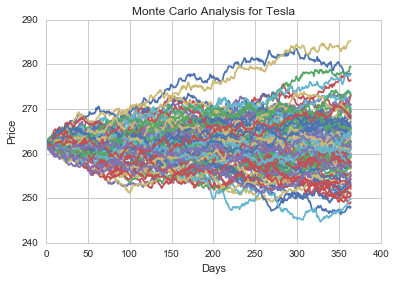

In [62]:
start_price = 262.00

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

In [63]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

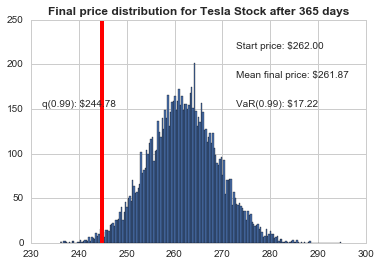

In [65]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Tesla stock, which looks to be $17.22 for every investment of 262.00 (the price of one inital tesla stock).

This basically means for every initial stock you purchase your putting about $17.22 at risk 99% of the time from our Monte Carlo Simulation.

**More excercises to do**

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices.